<a href="https://colab.research.google.com/github/SHIN-sped/SHIN-sped/blob/master/%5BLesson02%5D_CosPro_1_SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cos Pro 1급 2회 문제 1 - 클래스
- 도서 대여점의 만화책과 소설책의 대여 요금이 다음과 같습니다.
        | 구분   | 대여 요금       | 추가 요금             |
        |--------|-----------------|-----------------------|
        | 만화책 | 첫 2일 500원 | 이후 1일당 200원씩 추가  |
        | 소설책 | 첫 3일 1000원 | 이후 1일당 300원씩 추가 |

- 만화책과 소설책의 대여 요금을 계산하기 위해 아래 그림과 같이 Book 인터페이스와 ComicBook, Novel 클래스를 작성했습니다.

  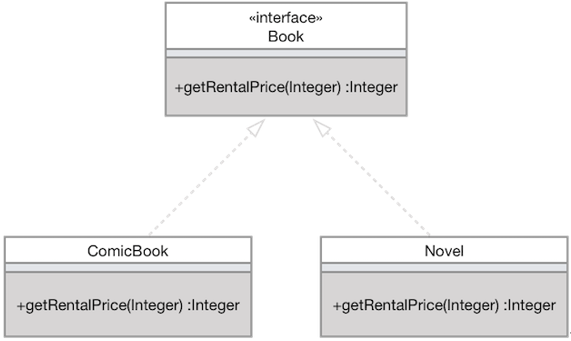


- Book :
  - Book은 책의 인터페이스입니다.
  - 책은 get_rental_price 함수를 구현해야 합니다.
  - get_rental_price 함수는 대여 기간을 매개변수로 받아 대여 요금을 계산합니다.

- ComicBook :
  - ComicBook은 만화책을 나타내는 클래스이며, Book 인터페이스를 구현합니다.
  - get_rental_price 함수는 대여 기간을 매개변수로 받아 만화책의 대여 요금을 계산합니다.

- Novel :
  - Novel은 소설책을 나타내는 클래스이며, Book 인터페이스를 구현합니다.
  - get_rental_price 함수는 대여 기간을 매개변수로 받아 소설책의 대여 요금을 계산합니다.

- 대여를 원하는 책들의 종류가 들어있는 리스트 book_types와 대여 기간 day가 매개변수로 주어질 때, 전체 대여 요금을 return 하도록 solution 함수를 작성하려고 합니다. 위의 클래스 구조를 참고하여 주어진 코드의 빈칸을 적절히 채워 전체 코드를 완성해주세요.



- 매개변수 설명
대여를 원하는 책들의 종류가 들어있는 리스트 book_types와 대여 기간 day가 solution 함수의 매개변수로 주어집니다.
        - book_types의 길이는 1 이상 50 이하입니다.
        - book_types에는 만화책을 뜻하는 문자열 "comic"과 소설책을 뜻하는 문자열 "novel"이 들어있습니다.
        - 예를 들어 ["comic", "comic", "novel"]이 매개변수로 주어진다면, 이는 만화책 두 권과 소설책 한 권을 나타냅니다.
        - day는 1 이상 100 이하의 자연수입니다.

- return 값 설명
   - 전체 대여 요금을 return 해주세요.

-  예시
        | book_types                  | day | return |
        |-----------------------------|-----|--------|
        | ["comic", "comic", "novel"] | 4   | 3100   |


In [ ]:
comic, 4 -> 500 + 200*2 => 900
comic, 4 -> 900
novel, 4 -> 1000 + 300 => 1300
900+900+1300 => 3100

In [ ]:
  | 구분   | 대여 요금       | 추가 요금             |
  |--------|-----------------|-----------------------|
  | 만화책 | 첫 2일 500원 | 이후 1일당 200원씩 추가  |
  | 소설책 | 첫 3일 1000원 | 이후 1일당 300원씩 추가 |

In [ ]:
from abc import *
 
    
class Book(metaclass=ABCMeta):
    @abstractmethod
    def get_rental_price(self, day):
        pass
    
    
class ComicBook(Book):
    def get_rental_price(self, day):
        cost = 500
        day -= 2
        if day > 0:
            cost += day * 200
        return cost
    
    
class Novel(Book):
    def get_rental_price(self, day):
        cost = 1000
        day -= 3
        if day > 0:
            cost += day * 300
        return cost
    
    
def solution(book_types, day):
    books = []
    for types in book_types:
        if types == "comic":
            books.append(ComicBook())
        elif types == "novel":
            books.append(Novel())
    total_price = 0
    for book in books:
        total_price += book.get_rental_price(day)
    return total_price


#아래는 테스트케이스 출력을 해보기 위한 코드입니다.
book_types = ["comic", "comic", "novel"]
day = 4
ret = solution(book_types, day)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret, "입니다.")

solution 함수의 반환 값은 3100 입니다.


## Cos Pro 1급 2회 문제 2 - 빈칸 채우기
A 지하철역의 오늘 하루 지하철 도착 시각이 순서대로 들어있는 리스트가 있습니다. 현재 시간이 주어졌을 때, 지하철을 타기위해서는 최소 몇 분을 기다려야 하는지 구하려 합니다. 이를 위해 다음과 같이 프로그램 구조를 작성했습니다.

    1. 00:00을 기준으로 해서 현재 시각을 분 단위로 변환합니다.
    2. 리스트를 순회하며 다음을 수행합니다.
        2-1. 00:00을 기준으로, 각 지하철 도착 시각을 분 단위로 변환합니다.
        2-2. 현재 시각과 지하철 도착 시각을 비교하여 최소 대기 시간을 구합니다.
    3. 2번 단계에서 구한 최소 대기 시간을 return 합니다.

오늘 하루 동안의 지하철 도착 시각이 순서대로 들어있는 리스트 subway_times와 현재시간 current_time이 매개변수로 주어질 때, 지하철을 타기 위해 기다려야 하는 최소 대기 시간을 return 하도록 solution 함수를 작성했습니다. 이때, 위 구조를 참고하여 중복되는 부분은 func_a라는 함수로 작성했습니다. 코드가 올바르게 동작할 수 있도록 빈칸을 알맞게 채워 전체 코드를 완성해주세요.

- 매개변수 설명
- 오늘 하루 동안의 지하철 도착 시각이 순서대로 들어있는 리스트 subway_times와 현재시간 current_time이 solution 함수의 매개변수로 주어집니다. 
    - subway_times의 길이는 1 이상 100 이하입니다.
    - subway_times에는 지하철 도착 시간이 중복없이 들어있습니다.
      - 지하철 도착 시각과 현재 시각은 24시간 표기법을 이용하여 나타냅니다.
      - 24시간 표기법은 00:00부터 23:59까지로 시간을 표기합니다.
    - 입력으로 주어지는 시간은 항상 "XX:YY"형태로 주어집니다.
    - 지하철 첫차 도착 시각은 05:00 이후이며, 막차 도착 시각은 23:59 이전입니다.

- return 값 설명
   - 지하철을 타기 위해 기다려야 하는 최소 대기 시간을 return 해주세요.
   - 만약 오늘 탈 수 있는 지하철이 없다면 -1을 return 하면 됩니다.

- 예시

        | subway_times                         | current_time | return |
        |--------------------------------------|--------------|--------|
        | ["05:31", "11:59", "13:30", "23:32"] | "12:00"      | 90     |
        | ["14:31", "15:31"]                   | "15:31"      | 0      |

- 예시 설명
   - 예시 #1 : 현재시간 12:00에서 가장 가까운 지하철 도착 시각은 13:30입니다. 따라서 최소 90분을 기다려야 합니다.
   - 예시 #2 : 현재 시각은 15:31이며, 15:31분에 도착하는 지하철에 탑승할 수 있습니다. 따라서 0분만 기다리면 됩니다.


In [ ]:
1. 00:00을 기준으로 해서 현재 시각을 분 단위로 변환합니다.
2. 리스트를 순회하며 다음을 수행합니다.
    2-1. 00:00을 기준으로, 각 지하철 도착 시각을 분 단위로 변환합니다.
    2-2. 현재 시각과 지하철 도착 시각을 비교하여 최소 대기 시간을 구합니다.
3. 2번 단계에서 구한 최소 대기 시간을 return 합니다.

In [ ]:
#  00:00을 기준으로 해서 시각을 분 단위로 변환
def func_a(times):
    hour = int(times[:2])
    minute = int(times[3:])
    return hour*60 + minute

def solution(subway_times, current_time):
    current_minute = func_a(current_time)   # 1.
    INF = 1000000000
    answer = INF
    for s in subway_times:  # 2.
        subway_minute = func_a(s)  # 2-1
        if subway_minute >= current_minute:  # 2-2
            answer = subway_minute - current_minute
            break
    if answer == INF:
        return -1
    return answer

#아래는 테스트케이스 출력을 해보기 위한 코드입니다.

subway_times1 = ["05:31", "11:59", "13:30", "23:32"]
current_time1 = "12:00"
ret1 = solution(subway_times1, current_time1)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret1, "입니다.")

subway_times2 = ["14:31", "15:31"]
current_time2 = "15:31"
ret2 = solution(subway_times2, current_time2)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret2, "입니다.")

solution 함수의 반환 값은 90 입니다.
solution 함수의 반환 값은 0 입니다.


## Cos Pro 1급 2회 문제 3 - 빈칸 채우기
A 사이트에서 아래 조건에 맞는 게시글을 **최초**로 작성하는 이용자에게 경품을 제공하려 합니다.

- 현재 작성되어있는 가장 마지막 게시글 이후에 작성된 게시글이어야 합니다.
- 게시글 번호의 자릿수가 짝수여야 합니다.
- 게시글 번호가 2n 자릿수 일때, 앞 n 자리의 각 자릿수의 합과 뒤 n 자리의 각 자릿수의 합이 같아야 합니다.

이 사이트의 게시글 번호는 마지막에 작성된 게시글 번호부터 1씩 증가합니다. 예를 들어, 가장 마지막 게시글의 번호가 235386이라면, 이후에 작성되는 게시글의 번호는 235387, 235388 ... 이 되며, 번호가 235387 이상인 게시글이 경품당첨의 대상이 됩니다.

당신은 경품을 받기위해 앞으로 게시글을 몇 개 더 작성해야 하는지 구하려 합니다. 이를 위해 다음과 같이 프로그램 구조를 작성했습니다.

    1. 게시글 번호를 1 증가시키고 자릿수를 구합니다.
    2. 만약 자릿수가 짝수가 아니라면 1로 돌아갑니다.
    3. 만약 구한 자릿수가 짝수라면 다음을 수행합니다.
      3-1. 앞 자릿수 절반과 뒷 자릿수 절반을 분리합니다.
      3-2. 앞 자릿수 절반의 자릿수 합과 뒷 자릿수 절반의 자릿수 합을 구합니다.
      3-3. 위에서 구한 합이 서로 같으면 4로 가고, 같지 않으면 1로 돌아갑니다.
    4. (3에서 구한 수 - 처음에 매개변수로 주어진 수)를 return 합니다.

가장 마지막 게시글의 번호 num이 매개변수로 주어질 때, 경품을 받기위해 앞으로 더 작성해야 하는 게시글의 개수를 return 하도록 solution 함수를 작성하려 합니다. 위 구조를 참고하여 코드가 올바르게 동작할 수 있도록 빈칸에 주어진 func_a, func_b, func_c 함수와 매개변수를 알맞게 채워주세요.


▣ 매개변수 설명 
- 현재까지 작성된 가장 마지막 게시글의 번호 num이 매개변수로 주어집니다.
- num은 1 이상 50,000,000 이하의 자연수입니다.

▣ return 값 설명
- 경품을 받기위해 앞으로 더 작성해야 하는 게시글의 개수를 return 해주세요.

▣ 예시

    | num      | return |
    |----------|--------|
    | 1        | 10     |
    | 235386   | 20     |

▣ 예시 설명

예시 #1
- 가장 마지막에 작성된 게시글의 번호가 1입니다. 
- 당첨조건을 만족하는 게시글 번호는 11이며, 따라서 최소 10번 더 게시글을 작성해야합니다.

예시 #2
- 가장 마지막에 작성된 게시글의 번호는 6자리이며, 3자리씩 끊으면 다음과 같습니다.
  - 앞 3자리 : 235, 뒤 3자리 : 386
- 앞 3자리의 각 자릿수 합은 다음과 같습니다 : 2 + 3 + 5 = 10
- 뒤 3자리의 각 자릿수 합은 다음과 같습니다 : 3 + 8 + 6 = 17

앞으로 최소 20개의 글을 더 작성한다면, 글 번호는 235406이 되며, 뒤 3자리의 각 자릿수 합은 다음과 같습니다.

  4 + 0 + 6 = 10

따라서 경품을 받기 위해 최소 20개의 글을 더 작성하면 됩니다.


In [ ]:
1. 게시글 번호를 1 증가시키고 자릿수를 구합니다.
2. 만약 자릿수가 짝수가 아니라면 1로 돌아갑니다.
3. 만약 구한 자릿수가 짝수라면 다음을 수행합니다.
  3-1. 앞 자릿수 절반과 뒷 자릿수 절반을 분리합니다.
  3-2. 앞 자릿수 절반의 자릿수 합과 뒷 자릿수 절반의 자릿수 합을 구합니다.
  3-3. 위에서 구한 합이 서로 같으면 4로 가고, 같지 않으면 1로 돌아갑니다.
4. (3에서 구한 수 - 처음에 매개변수로 주어진 수)를 return 합니다.

In [ ]:
# n = 3 => 1000
# n = 2 => 100
def func_a(n):
    ret = 1   # 1 -> 10 -> 100 -> 1000 ...
    while n > 0:
        ret *= 10
        n -= 1
    return ret

# n => 367, 36, 3, 0
# ret => 0, 1, 2, 3
# n의 자릿수를 반환하는 함수
def func_b(n):
    ret = 0
    while n > 0:
        ret += 1
        n //= 10
    return ret

# n => 367, 36, 3, 0
# ret => 0+7+6+3
# n의 각 자릿수 합을 구해 반환하는 함수
def func_c(n):
    ret = 0
    while n > 0:
        ret += n%10
        n //= 10
    return ret


def solution(num):
    next_num = num
    while True:
        next_num += 1   # 1.
        length = func_b(next_num)
        if length % 2:  # 2.
            continue
        # 자릿수가 짝수인 경우
        divisor = func_a(length//2)  #123456 -> length//2 => 3, 1000   123456%1000
        front = next_num // divisor  #  3-1    
        back = next_num % divisor    #  3-1
        
        front_sum = func_c(front)
        back_sum = func_c(back)
        if front_sum == back_sum:
            break
            
    return next_num - num

#아래는 테스트케이스 출력을 해보기 위한 코드입니다.
num1 = 1
ret1 = solution(num1)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret1, "입니다.")

num2 = 235386
ret2 = solution(num2)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret2, "입니다.")

solution 함수의 반환 값은 10 입니다.
solution 함수의 반환 값은 20 입니다.


## Cos Pro 1급 2회 문제 4 - 구현
자연수가 중복 없이 들어있는 리스트가 있습니다. 이 리스트에서 합이 K의 배수가 되도록 서로 다른 숫자 세개를 고르는 방법은 몇 가지인지 세려고 합니다.

자연수가 들어있는 리스트 arr가 매개변수로 주어질 때, 이 리스트에서 합이 K의 배수가 되도록 서로 다른 숫자 세개를 고르는 방법의 가짓수를 return 하도록 solution 함수를 완성해주세요.


**▣ 매개변수 설명**

자연수가 들어있는 리스트 arr가 solution 함수의 매개변수로 주어집니다.
- arr의 길이는 3 이상 100 이하입니다.
- arr에는 1 이상 1,000 이하의 자연수가 중복 없이 들어있습니다.
- K는 1 이상 10 이하의 자연수입니다.

**▣ return 값 설명**

리스트에서 합이 K의 배수가 되도록 서로 다른 숫자 세개를 고르는 방법의 가짓수를 return 해주세요.
- 그러한 방법이 없다면 0을 return 하면 됩니다.

**▣ 예시**

    | arr             | K | return |
    |-----------------|---|--------|
    | [1, 2, 3, 4, 5] | 3 | 4      |

**▣ 예시 설명**

다음과 같이 4가지 방법이 있습니다.

- 1 + 2 + 3 = 6
- 1 + 3 + 5 = 9
- 2 + 3 + 4 = 9
- 3 + 4 + 5 = 12


In [ ]:
1 2 3 4 5

1 2 3
1 2 4
1 2 5
1 3 4
1 3 5
1 4 5
2 3 4
2 3 5
2 4 5
3 4 5

In [ ]:
arr = [1,2,3,4,5]
for i in range(len(arr)-2):
   for j in range(i+1, len(arr)-1):
       for k in range(j+1, len(arr)):
            print(arr[i], arr[j], arr[k])

1 2 3
1 2 4
1 2 5
1 3 4
1 3 5
1 4 5
2 3 4
2 3 5
2 4 5
3 4 5


In [ ]:
#다음과 같이 import를 사용할 수 있습니다.
#import math

def solution(arr, K):
    #여기에 코드를 작성해주세요.
    answer = 0
    for i in range(len(arr)-2):
        for j in range(i+1, len(arr)-1):
            for k in range(j+1, len(arr)):
                tot = arr[i] + arr[j] + arr[k]
                if not tot % K :    # if tot % K == 0:
                    answer += 1
    return answer

#아래는 테스트케이스 출력을 해보기 위한 코드입니다.
arr = [1, 2, 3, 4, 5]
K = 3
ret = solution(arr, K)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은 ", ret, " 입니다.")

solution 함수의 반환 값은  4  입니다.


## Cos Pro 1급 2회 문제 5 - 구현

자연수가 들어있는 리스트가 있습니다. 이 리스트에서, 숫자가 연속해서 증가하는 가장 긴 구간의 길이를 구하려 합니다. 단, 바로 전 숫자와 현재 숫자가 같은 경우는 증가한 것으로 보지 않습니다.

예를 들어 리스트에 순서대로 [3, 1, 2, 4, 5, 1, 2, 2, 3, 4]가 들어있는 경우, [1, 2, 4, 5]가 들어있는 구간이 숫자가 연속해서 증가한 가장 긴 구간이며, 길이는 4입니다.

자연수가 들어있는 리스트 arr가 매개변수로 주어질 때, 숫자가 연속해서 증가하는 가장 긴 구간의 길이를 return 하도록 solution 함수를 완성해주세요.


**▣ 매개변수 설명**

자연수가 들어있는 리스트 arr가 solution 함수의 매개변수로 주어집니다.
- arr의 길이는 2 이상 200,000 이하입니다.
- arr의 원소는 1 이상 1,000,000 이하의 자연수입니다.

**▣ return 값 설명**

숫자가 연속해서 증가하는 가장 긴 구간의 길이를 return 해주세요.
- 길이가 2 이상인 증가하는 구간이 없다면 1을 return 해주세요.

**▣ 예시**

    | arr                            | return |
    |--------------------------------|--------|
    | [3, 1, 2, 4, 5, 1, 2, 2, 3, 4] | 4      |

**▣ 예시 설명**

숫자 [1, 2, 4, 5]가 들어있는 구간이 숫자가 연속해서 증가하는 가장 긴 구간이며, 길이는 4입니다.

현재 숫자가 바로 이전 숫자와 같은 경우에는 증가했다고 보지 않습니다. [1, 2, 2, 3, 4]가 들어있는 구간은 [2, 2]가 연속해서 증가한 부분이 아니므로, [1, 2]가 들어있는 구간과 [2, 3, 4]가 들어있는 구간으로 나누어야 합니다.



In [ ]:
3, 1, 2, 4, 5, 1, 2, 2, 3, 4
1
   1  2  3  4
               1  2
                      1  2  3
prev, curr                      

In [ ]:
#다음과 같이 import를 사용할 수 있습니다.
#import math

def solution(arr):
    #여기에 코드를 작성해주세요.
    prev = arr[0]
    cnt = 1
    max_cnt = 1
    for curr in arr[1:]:
        cnt = cnt + 1 if prev < curr else 1
        prev = curr
        max_cnt = max(max_cnt, cnt)
    return max_cnt

#아래는 테스트케이스 출력을 해보기 위한 코드입니다.
arr = [3, 1, 2, 4, 5, 1, 2, 2, 3, 4]
#arr = [3, 2, 1]
ret = solution(arr)


#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret, "입니다.")

solution 함수의 반환 값은 4 입니다.


In [ ]:
#다음과 같이 import를 사용할 수 있습니다.
#import math

def solution(arr):
    #여기에 코드를 작성해주세요.
    prev = arr[0]
    cnt = 1
    max_cnt = 1
    for curr in arr[1:]:
        if prev < curr:
            cnt += 1            
        else:
            max_cnt = max(max_cnt, cnt)
            cnt = 1 
        prev = curr        
    return max_cnt

#아래는 테스트케이스 출력을 해보기 위한 코드입니다.
arr = [3, 1, 2, 4, 5, 1, 2, 2, 3, 4]
arr = [3, 2, 1]
ret = solution(arr)


#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret, "입니다.")

solution 함수의 반환 값은 1 입니다.


## Cos Pro 1급 2회 문제 6 - 구현
로봇이 아래 그림과 같이 2차원 평면의 원점 (0, 0)에 서있습니다. 




  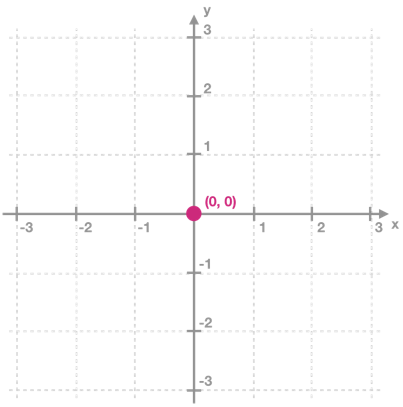

이 로봇은 x축 방향, 혹은 y축 방향으로만 움직일 수 있으며, 알파벳으로 명령을 내릴 수 있습니다. 명령을 내릴 때 사용하는 알파벳은 'L', 'R', 'U', 'D'의 4가지이며, 'L'은 x축 방향으로 -1만큼, 'R'은 x축 방향으로 +1만큼, 'U'는 y축 방향으로 +1만큼, 'D'는 y축 방향으로 -1 만큼 이동하라는 의미입니다. 

로봇에게 내린 명령이 순서대로 들어있는 문자열 commands가 매개변수로 주어질 때, 주어진 명령을 모두 수행한 후의 로봇 위치를 return 하도록 solution 함수를 완성해주세요.


**▣ 매개변수 설명**

로봇에게 내린 명령이 순서대로 들어있는 문자열 commands가 solution 함수의 매개변수로 주어집니다.
- commands는 알파벳 대문자 'L', 'R', 'U', 'D'로만 이루어진 문자열이며, 길이는 1 이상 100 이하입니다.

**▣ return 값 설명**

주어진 명령을 모두 수행한 후의 로봇 위치를 return 해주세요.
- [x축 좌표, y축 좌표] 형태로 로봇의 최종 위치를 리스트에 담아 return 해주세요.

**▣ 예시**

    | commands   | return  |
    |------------|---------|
    | "URDDL"    | [0, -1] |

**▣ 예시 설명**

"URDDL"명령에 따라 (0, 0)에 있는 로봇은 다음과 같이 움직입니다.

* [0, 0] → [0, 1] → [1, 1] → [1, 0] → [1, -1] → [0, -1]

따라서 로봇의 최종 위치는 [0, -1]입니다.


In [ ]:
'L'은 x축 방향으로 -1만큼, 'R'은 x축 방향으로 +1만큼, 'U'는 y축 방향으로 +1만큼, 'D'는 y축 방향으로 -1 만큼 이동하라는 의미
L [-1, 0]
R [1, 0]
U [0, 1]
D [0, -1]

In [ ]:
move1 = {'L': [-1, 0], 'R':[1, 0], 'U':[0, 1], 'D': [0, -1]}
move2 = dict(zip('LRUD', [[-1, 0],[1, 0],[0, 1],[0, -1]]))
print(move1, move2, sep='\n')

{'L': [-1, 0], 'R': [1, 0], 'U': [0, 1], 'D': [0, -1]}
{'L': [-1, 0], 'R': [1, 0], 'U': [0, 1], 'D': [0, -1]}


In [ ]:
#다음과 같이 import를 사용할 수 있습니다.
#import math

def solution(commands):
    # 여기에 코드를 작성해주세요.
    move = dict(zip('LRUD', [[-1, 0],[1, 0],[0, 1],[0, -1]]))
    rX, rY = 0, 0   # 로봇의 초기위치
    for c in commands:
        #print(move[c])
        dX, dY = move[c]
        rX += dX
        rY += dY
    return [rX, rY]  # 로봇의 최종위치

#아래는 테스트케이스 출력을 해보기 위한 코드입니다.
commands = "URDDL"
ret = solution(commands)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은 ", ret, " 입니다.")

solution 함수의 반환 값은  [0, -1]  입니다.


## Cos Pro 1급 2회 문제 7 - 빈칸 채우기

한국에는 다음과 같이 8가지 종류의 화폐가 있습니다.

- 동전 : 10원, 50원, 100원, 500원
- 지폐 : 1,000원, 5,000원, 10,000원, 50,000원

손님에게 거슬러줘야 하는 금액이 주어질 때, 거슬러주는 동전과 지폐 개수의 합이 최소가 되도록 하려고 합니다.

예를 들어 거슬러줘야 할 금액이 2,760원 이라면, 1,000원짜리 2장, 500원짜리 1개, 100원짜리 2개, 50원짜리 1개, 10원짜리 1개를 거슬러줄 때 동전과 지폐 개수의 합이 최소가 됩니다.

손님에게 거슬러줘야 하는 금액 money가 매개변수로 주어질 때, 거슬러 주는 동전과 지폐 개수합의 최솟값을 return 하도록 solution 함수를 작성하려 합니다. 빈칸을 채워 전체 코드를 완성해주세요.


**▣ 매개변수 설명**

손님에게 거슬러줘야 하는 금액 money가 solution 함수의 매개변수로 주어집니다.
- money는 10 이상 100,000 이하의 자연수입니다.
- money는 10의 배수로만 주어집니다.

**▣ return 값 설명**

거슬러 주는 동전과 지폐 개수합의 최솟값을 return 해주세요.

**▣ 예시**

    | money | return |
    |-------|--------|
    | 2760  | 7      |

**▣ 예시 설명**

2760원을 거슬러주는 방법은 여러 가지가 있지만, 다음과 같이 거슬러 줄 때, 필요한 동전과 지폐 개수가 최소가 됩니다.
- 1,000원 : 2장
- 500원 : 1개
- 100원 : 2개
- 50원 : 1개
- 10원 : 1개

따라서 7을 return 하면 됩니다.


In [ ]:
def solution(money):
    coin = [10, 50, 100, 500, 1000, 5000, 10000, 50000]
    counter = 0   #  최소 동전의 개수
    idx = len(coin) - 1
    while money:
        counter += money // coin[idx]
        money %= coin[idx]
        idx -= 1
    return counter

#아래는 테스트케이스 출력을 해보기 위한 코드입니다.
money = 2760
ret = solution(money)


#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret, "입니다.")

solution 함수의 반환 값은 7 입니다.


## Cos Pro 1급 2회 문제 8 - 한줄 수정하기
자연수가 들어있는 리스트가 주어질 때, 다음 규칙에 따라 새로운 리스트를 만들려고 합니다.

* 주어진 리스트의 첫 번째 원소를 새로운 리스트의 첫 번째 원소에 넣습니다.
* 주어진 리스트의 마지막 원소를 새로운 리스트의 두 번째 원소에 넣습니다.
* 계속해서 주어진 리스트의 남아있는 원소중 가장 앞에있는 원소와 가장 뒤에있는 원소를 번갈아 가져와 새로운 리스트에 순서대로 넣습니다.
* 주어진 리스트에 더이상 원소가 남아있지 않을 때까지 위 과정을 반복합니다.

자연수가 들어있는 리스트 arr가 매개변수로 주어질 때, 위 과정을 수행해서 만든 새로운 리스트를 return 하도록 solution 함수를 작성했습니다. 그러나, 코드 일부분이 잘못되어있기 때문에, 몇몇 입력에 대해서는 올바르게 동작하지 않습니다. 주어진 코드에서 _**한 줄**_만 변경해서 모든 입력에 대해 올바르게 동작하도록 수정하세요.


**▣ 매개변수 설명**

자연수가 들어있는 리스트 arr가 solution 함수의 매개변수로 주어집니다.
* arr의 길이는 1 이상 1,000 이하입니다.
* arr의 원소는 1 이상 10,000 이하의 자연수입니다.

**▣ return 값 설명**

문제에 주어진 과정을 수행해서 만든 새로운 리스트를 return 해주세요.

**▣ 예시**

    | arr                | return             |
    |--------------------|--------------------|
    | [1, 2, 3, 4, 5, 6] | [1, 6, 2, 5, 3, 4] |

**▣ 예시 설명**

처음에 주어진 리스트는 [1, 2, 3, 4, 5, 6]입니다. 주어진 규칙에 맞게 새로운 리스트를 만드는 과정은 다음과 같습니다.

    | 처음 리스트 arr    | 새로운 리스트      |
    |--------------------|--------------------|
    | [1, 2, 3, 4, 5, 6] | [ ]                |
    | [2, 3, 4, 5, 6]    | [1]                |
    | [2, 3, 4, 5]       | [1, 6]             |
    | [3, 4, 5]          | [1, 6, 2]          |
    | [3, 4]             | [1, 6, 2, 5]       |
    | [4]                | [1, 6, 2, 5, 3]    |
    | [ ]                | [1, 6, 2, 5, 3, 4] |
 


In [ ]:
def solution(arr):  # [1, 2, 3, 4, 5, 6]
    left, right = 0, len(arr) - 1
    idx = 0   # 새로운 리스트에 숫자를 넣을 위치
    answer = [0 for _ in range(len(arr))]   # 새로운 리스트
    while left <= right:   # 0 <= 5   1 <= 5    1 <= 4
        if idx % 2 == 0:   # 0 % 2   1 % 2    1 % 2(XXXX)
            answer[idx] = arr[left]   # answer = [1, 6, 0, 0, 0, 0]
            left += 1   # left = 1
        else:
            answer[idx] = arr[right]
            right -= 1  # right = 4
        idx += 1   # idx = 2
    return answer

#아래는 테스트케이스 출력을 해보기 위한 코드입니다. 아래 코드는 잘못된 부분이 없으니, solution 함수만 수정하세요.
arr = [1, 2, 3, 4, 5, 6]
ret = solution(arr)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은 ", ret, " 입니다.")

solution 함수의 반환 값은  [1, 6, 2, 5, 3, 4]  입니다.


## Cos Pro 1급 2회 문제 9 - 한줄 수정하기

주어진 비밀번호가 안전한지 아닌지 판단하려합니다. 비밀번호의 안전 여부는 다음 규칙으로 판단합니다.

* 연속된 3자리 이상의 알파벳 혹은 숫자를 사용할 수 없습니다. (abc, cba, 012, 987 등)

비밀번호에 사용할 문자열 password가 매개변수로 주어질 때, 주어진 문자열이 위 규칙에 맞으면 true를, 맞지 않으면 false를 return 하도록 solution 함수를 작성했습니다. 그러나, 코드 일부분이 잘못되어있기 때문에, 몇몇 입력에 대해서는 올바르게 동작하지 않습니다. 주어진 코드에서 _**한 줄**_만 변경해서 모든 입력에 대해 올바르게 동작하도록 수정하세요.


**▣ 매개변수 설명**

비밀번호에 사용할 문자열 password가 solution 함수의 매개변수로 주어집니다.
* password는 알파벳 소문자와 숫자로만 이루어진 문자열입니다.
* password의 길이는 5 이상 20 이하입니다.

**▣ return 값 설명**

주어진 문자열이 주어진 규칙에 맞으면 true를, 맞지 않으면 false를 return 해주세요.

**▣ 예시**

    | password    | return |
    |-------------|--------|
    | "cospro890" | true   |
    | "cba323"    | false  |

**▣ 예시 설명**

예시 #1
주어진 문자열에는 연속된 3자리 이상의 문자열 혹은 숫자가 없습니다.

예시 #2
"cba"가 연속된 3자리 문자열이므로 주어진 규칙에 맞지 않습니다.


In [ ]:
ord('a'), ord('b'), ord('c'), ord('0'), ord('1'), ord('2')

(97, 98, 99, 48, 49, 50)

In [ ]:
def solution(password):   # cba323
    length = len(password)  # length = 6
    for i in range(length - 2):   # i = 0, 1, 2, 3
        first_check = ord(password[i + 1]) - ord(password[i])   # 98-99 = -1
        second_check = ord(password[i+2]) - ord(password[i+1])  # 97-98 = -1
        if first_check == second_check and (first_check == 1 or first_check == -1):
            return False   # 연속된 3개
    return True

#아래는 테스트케이스 출력을 해보기 위한 코드입니다. 아래 코드는 잘못된 부분이 없으니, solution함수만 수정하세요.
password1 = "cospro890"
ret1 = solution(password1)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret1, "입니다.")

password2 = "cba323"
ret2 = solution(password2)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret2, "입니다.")

solution 함수의 반환 값은 True 입니다.
solution 함수의 반환 값은 False 입니다.


## Cos Pro 1급 2회 문제 10 - 한줄 수정하기
0과 1로만 이루어진 문자열에서 연속해서 붙어있는 0들을 하나의 0으로 줄이려 합니다.

예를 들어 "101100011100" 이란 문자열은 "101101110"으로 만들면 됩니다.

0과 1로만 이루어진 문자열 s가 매개변수로 주어질 때, 연속해서 붙어있는 0들을 하나의 0으로 줄인 문자열을 return 하도록 solution 함수를 작성했습니다. 그러나, 코드 일부분이 잘못되어있기 때문에, 몇몇 입력에 대해서는 올바르게 동작하지 않습니다. 주어진 코드에서 _**한 줄**_만 변경해서 모든 입력에 대해 올바르게 동작하도록 수정하세요.


**▣ 매개변수 설명**

0과 1로만 이루어진 문자열 s가 solution 함수의 매개변수로 주어집니다.
* s의 길이는 1 이상 1,000 이하입니다.

**▣ return 값 설명**

연속해서 붙어있는 0들을 하나의 0으로 줄인 문자열을 return 해주세요.

**▣ 예시**

    | s              | return      |
    |----------------|-------------|
    | "101100011100" | "101101110" |

**▣ 예시 설명**

1은 줄이지 않으며, 연속해서 붙어있는 0만 하나의 0으로 줄이면 됩니다.


In [ ]:
def solution(s): # "101100011100#"
    s += '#'
    answer = ""  # '1011'
    for i in range(len(s)):  # i = 0, 1, 2, 3, 4, ... 12 
        if s[i] == '0' and s[i + 1] != '0':   # '01', '0#'
            answer += '0'
        elif s[i] == '1':  # s[i] == '1', ==> s[i]=='0' and s[i+1] =='0'
            answer += '1'
    return answer

#아래는 테스트케이스 출력을 해보기 위한 코드입니다. 아래 코드는 잘못된 부분이 없으니, solution함수만 수정하세요.
s = "101100011100"
ret = solution(s)

#[실행] 버튼을 누르면 출력 값을 볼 수 있습니다.
print("solution 함수의 반환 값은", ret, "입니다.")

solution 함수의 반환 값은 101101110 입니다.
